**Если вы добавляете серию к датафрейму, то будьте внимательны с индексами! Если у серии будут индексы, которых нет у датафрейма, то значения из серии просто не добавятся к датафрейму!**



In [1]:
import numpy as np
import pandas as pd

In [5]:
data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [1,      2,     3,     4,     5,     6]}

# Изменение порядка столбцов в ДатаФрейме
df = pd.DataFrame(data, columns=['city', 'year', 'visits'], index=[chr(x) for x in range(ord('a'), ord('a') + 6)])
s1 = pd.Series([1, 10, 20], index=['a', 'd', 'f']) # Значения и их индексы
df['old_visits'] = s1 # Благодаря тому, что индексы указаны, значения будут добавлены только по ним
df

,city,year,visits,old_visits
a,Moscow,2022,1,1.0
b,Moscow,2021,2,NaN
c,Moscow,2020,3,NaN
d,Kazan,2022,4,10.0
e,Kazan,2021,5,NaN
f,Kazan,2020,6,20.0


In [6]:
s1 = pd.Series([1, 10, 20], index=['a', 'b', 'x']) # Значения и их индексы
df['old_visits'] = s1
df

,city,year,visits,old_visits
a,Moscow,2022,1,1.0
b,Moscow,2021,2,10.0
c,Moscow,2020,3,NaN
d,Kazan,2022,4,NaN
e,Kazan,2021,5,NaN
f,Kazan,2020,6,NaN


In [7]:
df['old_visits'] = np.arange(6)
df

,city,year,visits,old_visits
a,Moscow,2022,1,0
b,Moscow,2021,2,1
c,Moscow,2020,3,2
d,Kazan,2022,4,3
e,Kazan,2021,5,4
f,Kazan,2020,6,5


In [11]:
df.old_visits_two = np.arange(6)

In [12]:
df

,city,year,visits,old_visits
a,Moscow,2022,1,0
b,Moscow,2021,2,1
c,Moscow,2020,3,2
d,Kazan,2022,4,3
e,Kazan,2021,5,4
f,Kazan,2020,6,5


In [17]:
df['old_visits_two'] = np.arange(6)
df

,city,year,visits,old_visits,old_visits_two
a,Moscow,2022,1,0,0
b,Moscow,2021,2,1,1
c,Moscow,2020,3,2,2
d,Kazan,2022,4,3,3
e,Kazan,2021,5,4,4
f,Kazan,2020,6,5,5


**Есть несколько способов удалить колонку. Самый простой - использование оператора del.**

In [18]:
del df['old_visits_two']
df

,city,year,visits,old_visits
a,Moscow,2022,1,0
b,Moscow,2021,2,1
c,Moscow,2020,3,2
d,Kazan,2022,4,3
e,Kazan,2021,5,4
f,Kazan,2020,6,5


**Разработчики Pandas позаботились о нас и наделили датафрейм возможностью создаваться на основе вложенных словарей. Что это означает? А то, что вложенные словари уже содержат индексы строк. Внешние ключи будут отвечать за название колонок, а внутренние ключи за индексы строк:**



In [19]:
data2 = {'Moscow': {2020: 1500, 2021: 2000, 2022: 500},
         'Kazan': {2020: 200, 2021: 230, 2022: 100}}

df2 = pd.DataFrame(data2)
df2

,Moscow,Kazan
2020,1500,200
2021,2000,230
2022,500,100


**Уже знакомое нам свойство транспонирование работает и с датафреймом!**

In [21]:
df2.T

,2020,2021,2022
Moscow,1500,2000,500
Kazan,200,230,100


In [24]:
df2 = pd.DataFrame(data2, index=[2021, 2022, 2023])
df2

,Moscow,Kazan
2021,2000.0,230.0
2022,500.0,100.0
2023,NaN,NaN


In [38]:
s1 = pd.Series([1, 2, 3, 4])
s1.values

array([1, 2, 3, 4])

In [40]:
df.values

array([['Moscow', 2022, 1, 0],
       ['Moscow', 2021, 2, 1],
       ['Moscow', 2020, 3, 2],
       ['Kazan', 2022, 4, 3],
       ['Kazan', 2021, 5, 4],
       ['Kazan', 2020, 6, 5]], dtype=object)

In [41]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [42]:
df.columns

Index(['city', 'year', 'visits', 'old_visits'], dtype='object')

**Что нам важно запомнить?:**

1. У датафрейма два индекса, первый хранит индексы строк, а второй индексы колонок. Иногда вместо индексов употребляют слово лейбл (от англ label - метка).

Если вы где-то услышите: отредактируй лейблы колонок - это значит, что вас просят отредактировать названия колонок.

2. Индексы хранятся в специальном объекте Index, а не на прямую в массиве. Это ограничивает нас в его редактировании. Тут нужен грамотный подход, мы его будем проходить. Но на данном этапе знайте, что просто взять и попросить df.columns[0] = 'Новое имя колонки' не прокатит) 

Почему так? Можно об этом подумать, но нам остаётся это принять и выстраивать свою работу с учётом этих особенностей)

In [43]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s1

a    1
b    2
c    3
dtype: int64

In [46]:
index = s1.index
index

Index(['a', 'b', 'c'], dtype='object')

In [47]:
index[2]

'c'

In [48]:
index[1:]

Index(['b', 'c'], dtype='object')

In [49]:
index[0] = 'h'

TypeError: ignored

**На практике в явном виде pd.Index() редко создаётся. Обычно датафрейм делает за нас всю черновую работу. Надо только передать список или массив.**

In [50]:
labels = pd.Index(['A', 'B', 'C'])
labels

Index(['A', 'B', 'C'], dtype='object')

In [51]:
labels[0] = 'k'

TypeError: ignored

In [52]:
'A' in labels

True

In [53]:
s2 = pd.Series([1, 2, 3], labels)
s2

A    1
B    2
C    3
dtype: int64

**На вход подаётся датафрейм. Удалите столбец clicks. Функция должна вернуть итоговый датафрейм.**

In [54]:
import pandas as pd

def solution(_df):
    del _df['clicks']
    return _df

**На вход функции подаётся датафрейм:**

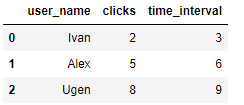

отредактируйте индекс второй строки:

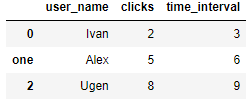


Функция должна вернуть отредактированный датафрейм.


In [56]:
import pandas as pd

def solution(_df):
    _df.index = [0, 'one', 2]
    return _df

**На вход функции подаётся датафрейм. Переведите название (лейблы) колонок в верхний регистр.**



In [57]:
import pandas as pd

def solution(_df):
    _df.columns = [col.upper() for col in _df.columns]
    return _df

**На вход функции подаётся некоторый датафрейм. Определите количество строк и количество столбцов в датафрейме. Функция должна вернуть кортеж: (количество строк, количество столбцов)**


Первый способ (костыльный):

- получить от датафрейма индексы строк и столбцов. Воспользоваться функцией len и построить кортеж:

(len(df.....), len(df....))

 

Второй способ (получше):

- Вспомнить как мы определяли размеры массива в numpy. Что это было за свойство? Попробовать запросить это свойство у датафрейма)

In [70]:
import pandas as pd

def solution(_df):
    return _df.shape